# Lab 2

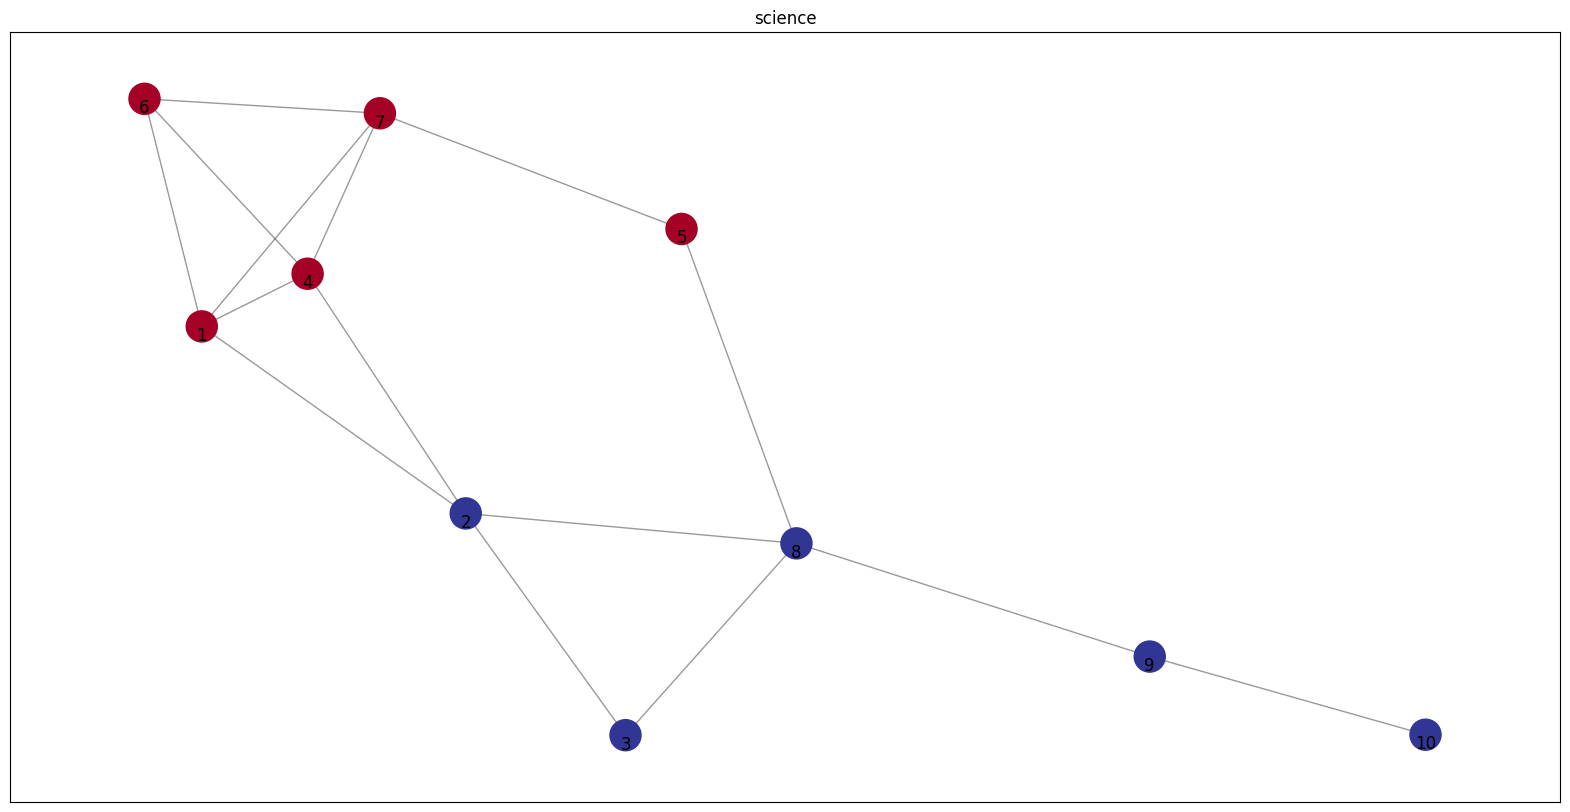

Community assignments: [1, 2, 2, 1, 1, 1, 1, 2, 2, 2]
Best Modularity value: 0.6022222222222222


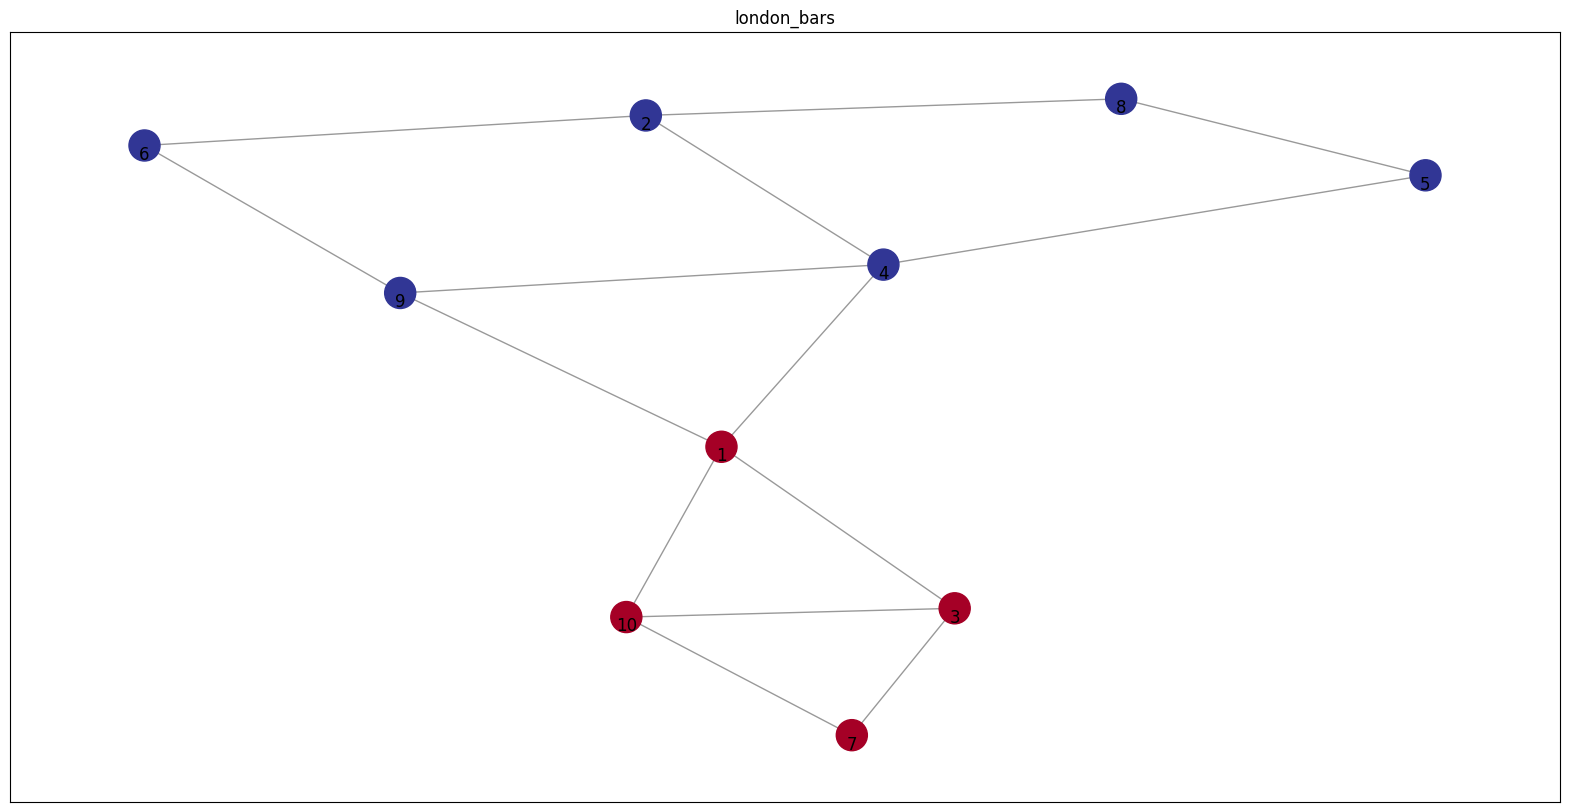

Community assignments: [1, 2, 1, 2, 2, 2, 1, 2, 2, 1]
Best Modularity value: 0.6556122448979591


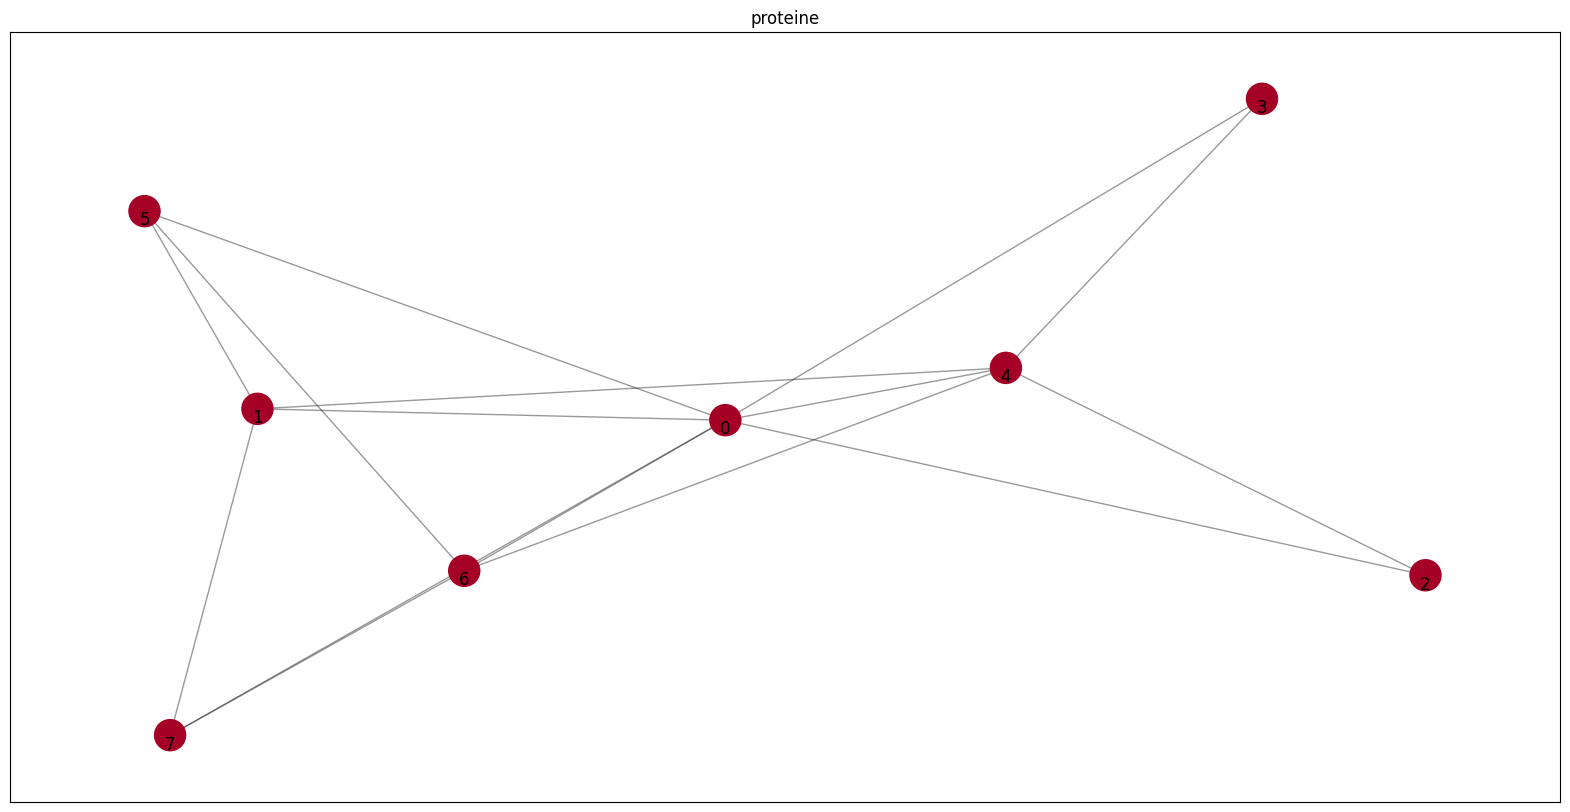

Community assignments: [0, 0, 0, 0, 0, 0, 0, 0]
Best Modularity value: 0.5733333333333334


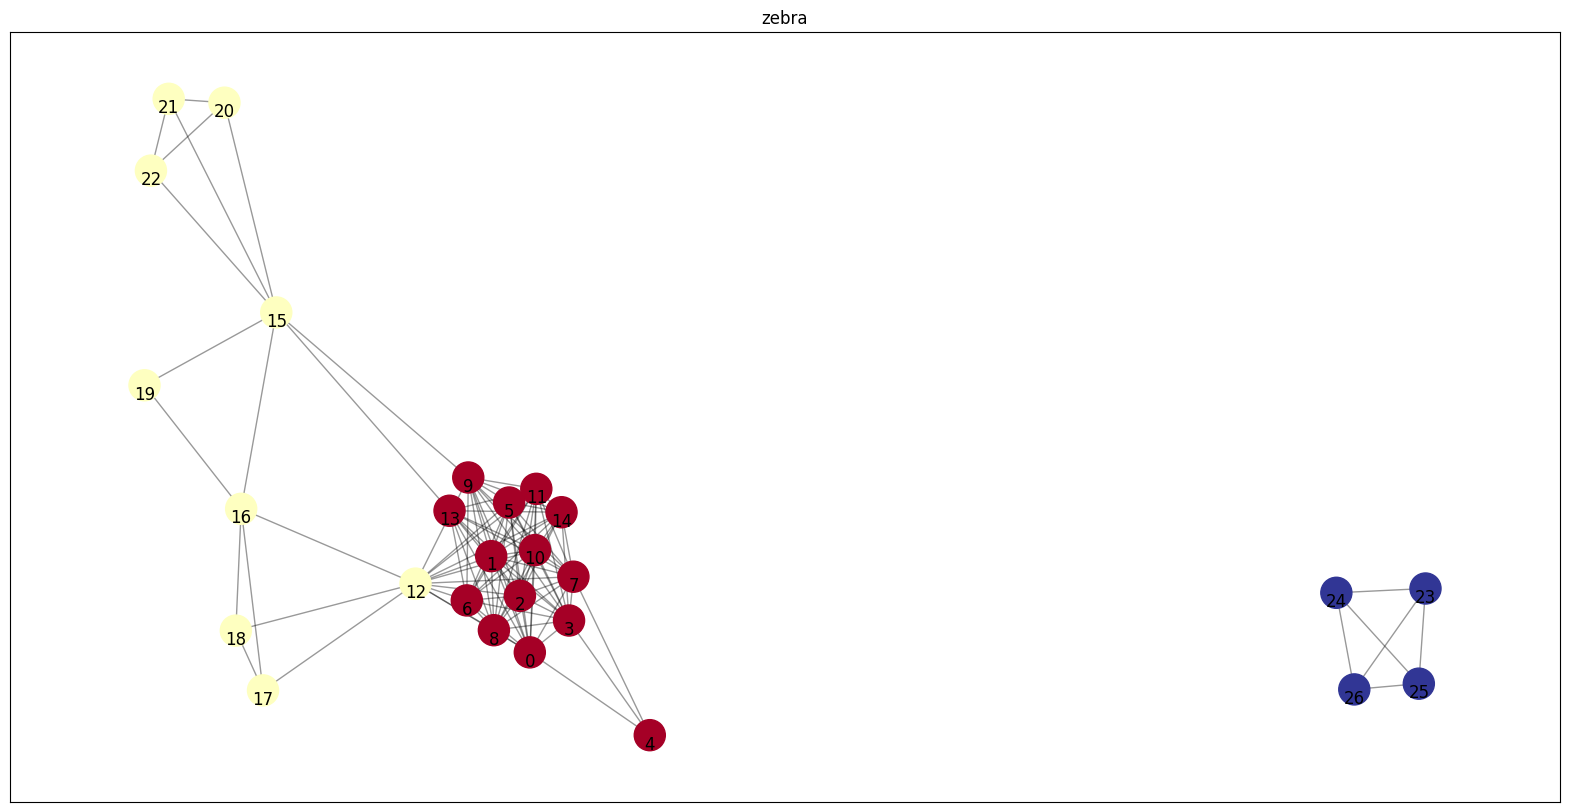

Community assignments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 23, 23, 23, 23]
Best Modularity value: 0.6044558071585099


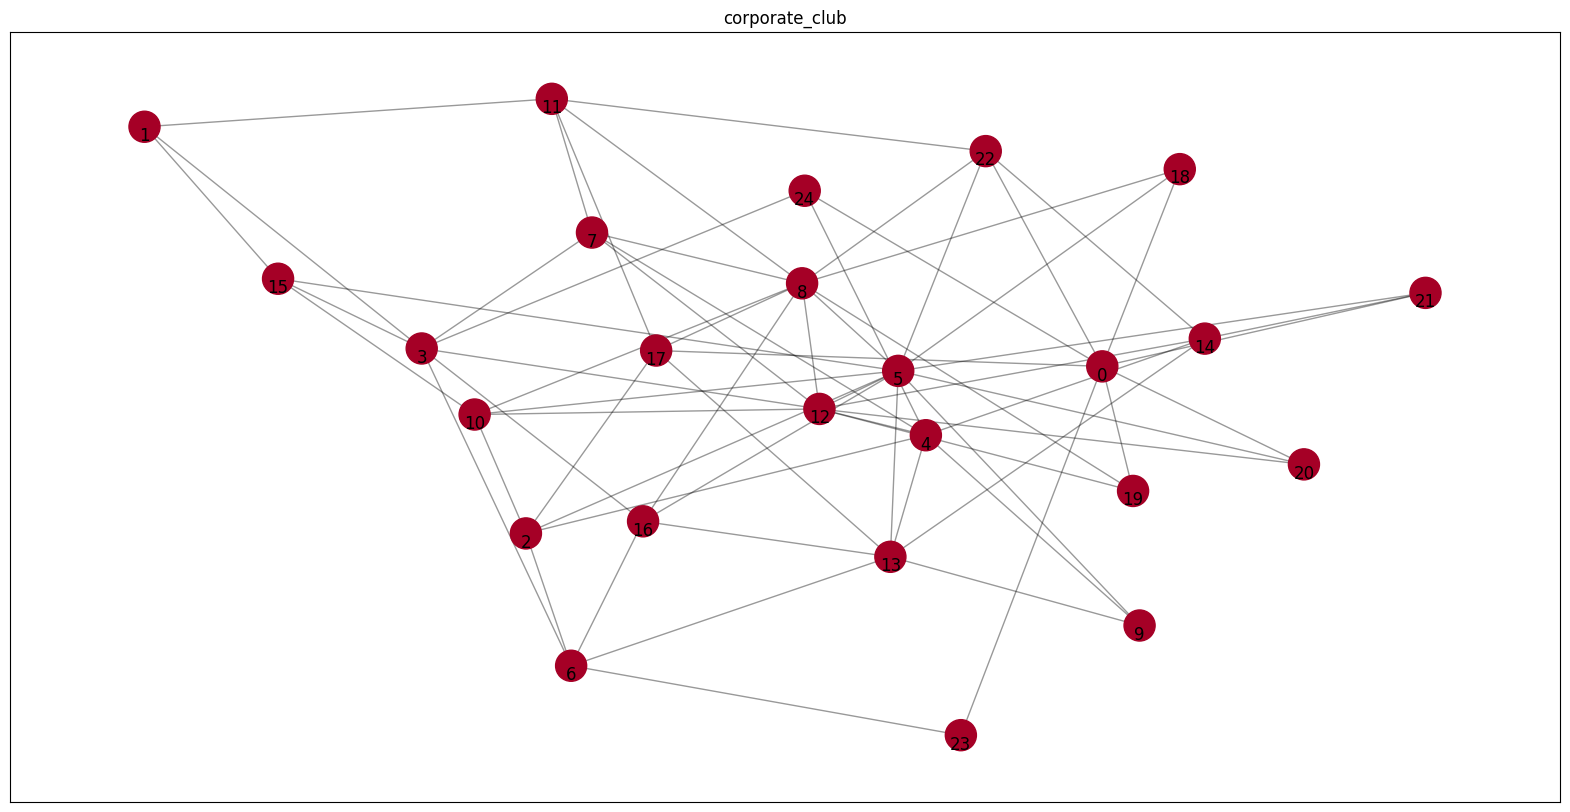

Community assignments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Best Modularity value: 0.5242194674012856


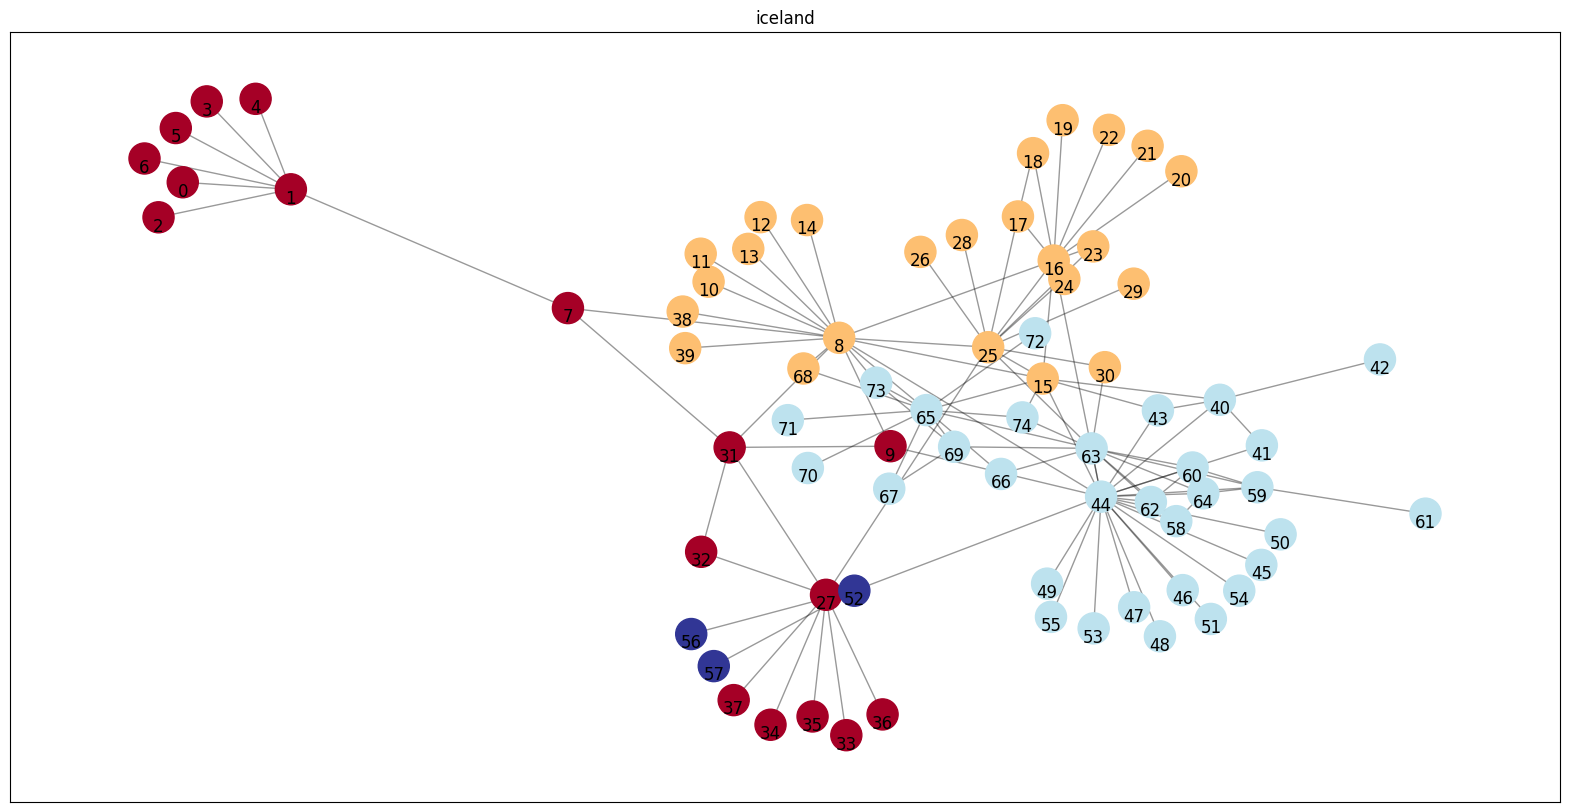

Community assignments: [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 8, 8, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 52, 40, 40, 40, 52, 52, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 8, 40, 40, 40, 40, 40, 40]
Best Modularity value: 0.6789781471221913


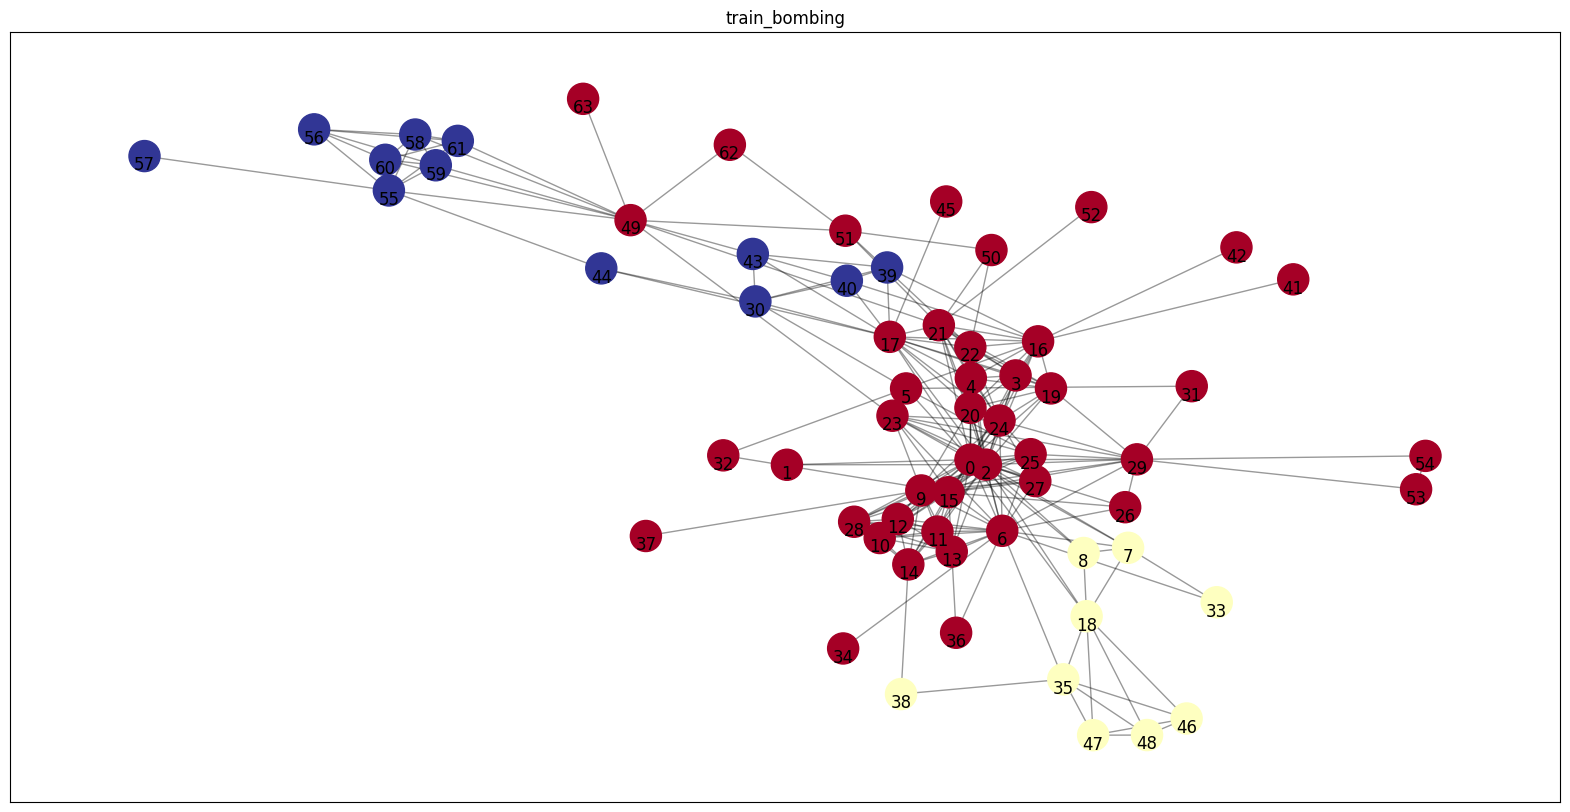

Community assignments: [0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 7, 0, 7, 0, 0, 7, 30, 30, 0, 0, 30, 30, 0, 7, 7, 7, 0, 0, 0, 0, 0, 0, 30, 30, 30, 30, 30, 30, 30, 0, 0]
Best Modularity value: 0.5905222781080122


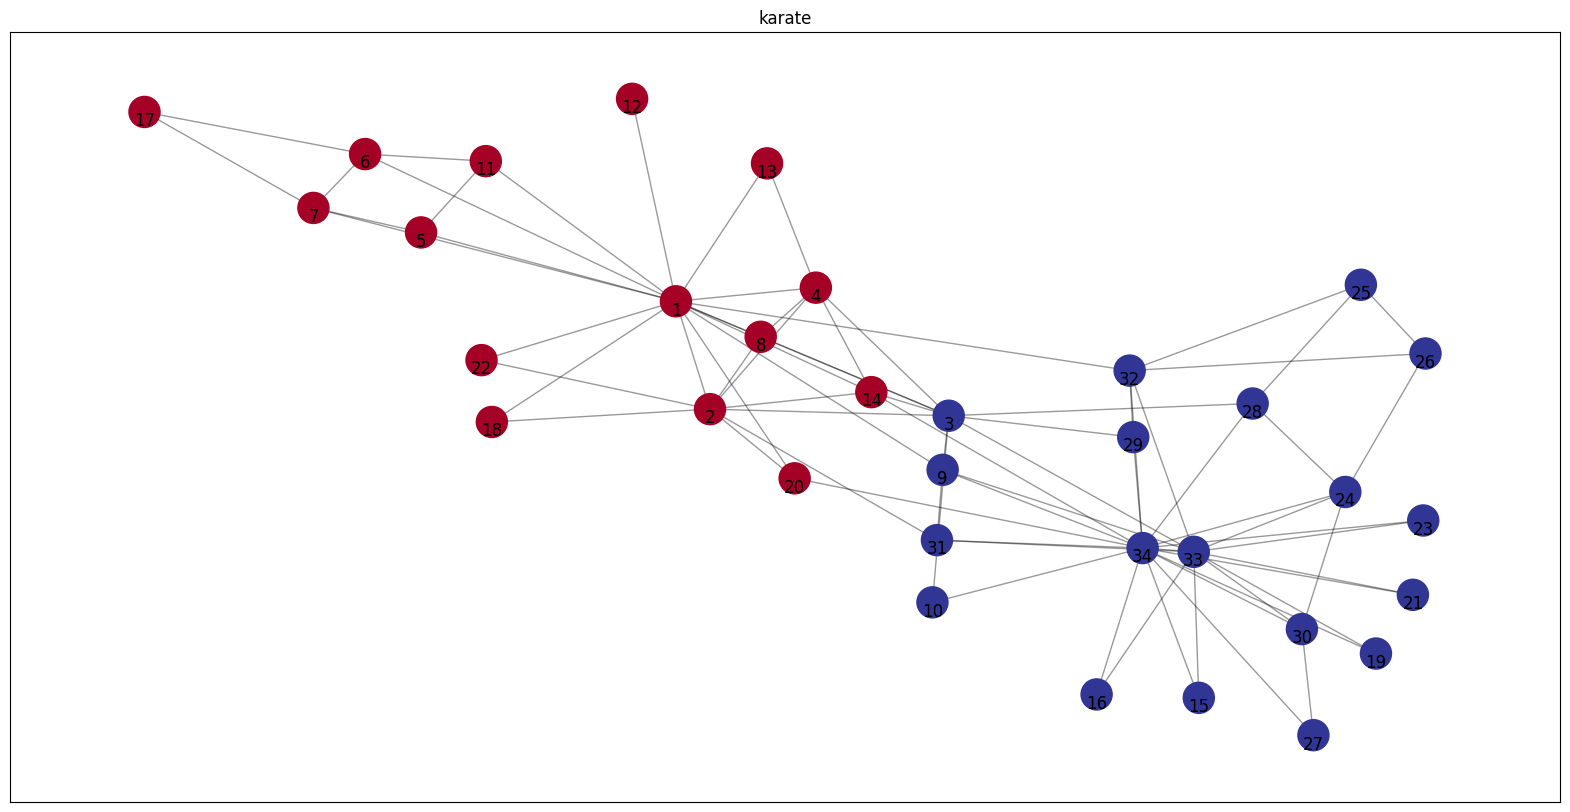

Community assignments: [1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Best Modularity value: 0.6407790927021694


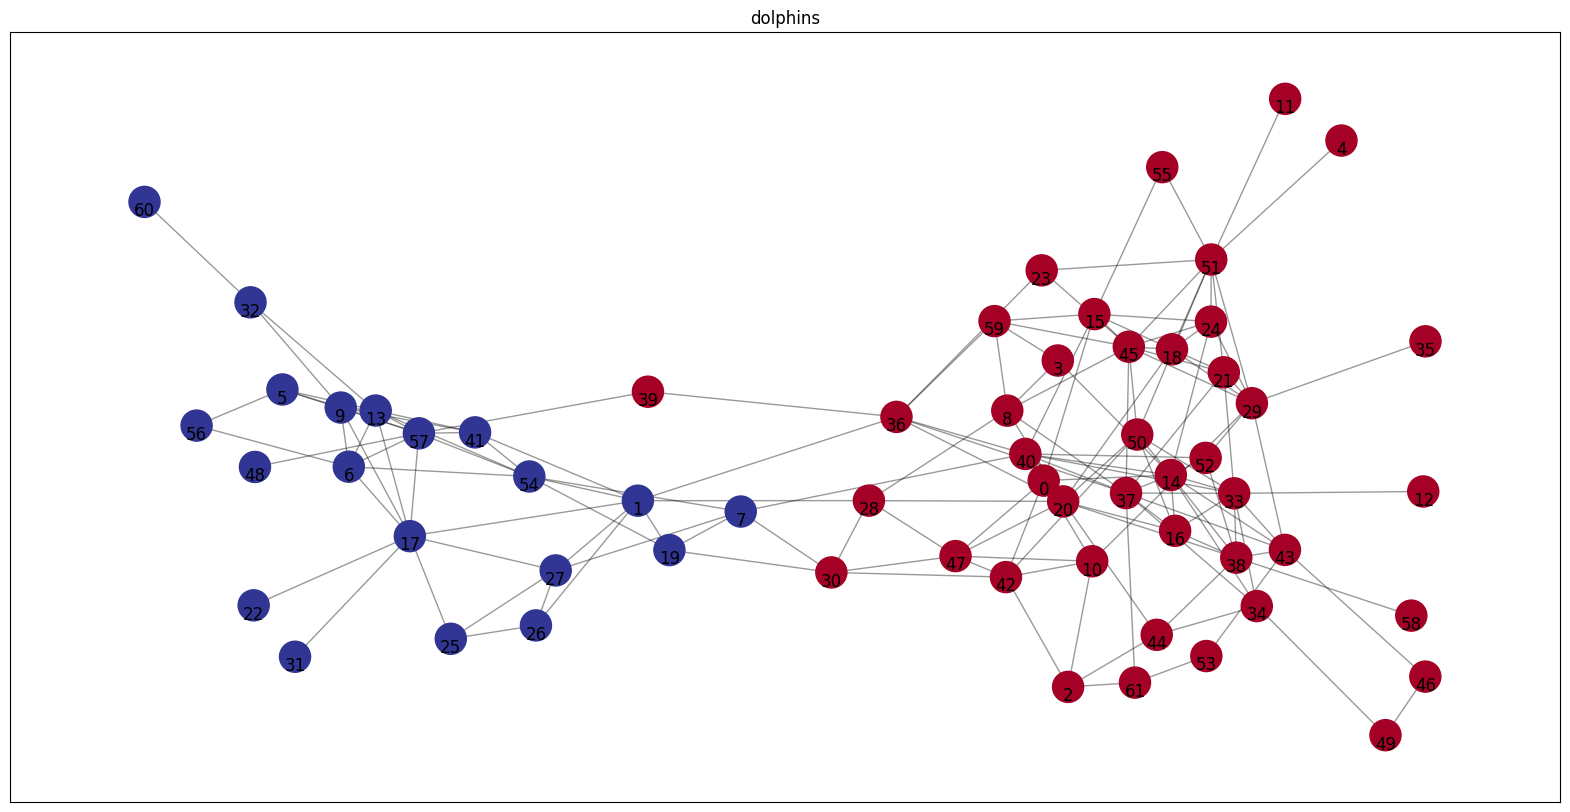

Community assignments: [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
Best Modularity value: 0.6785728412641908


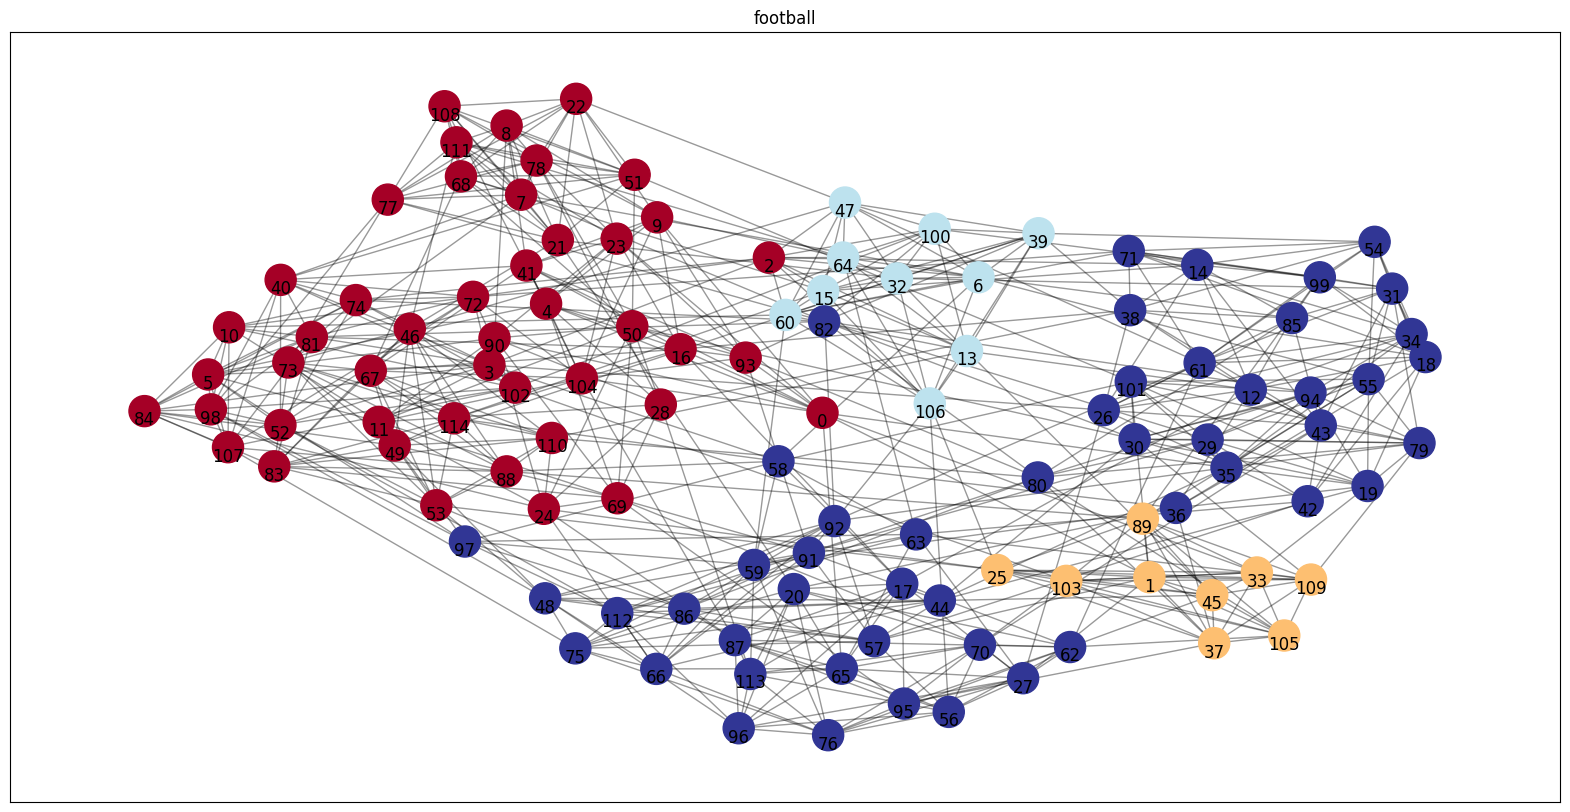

Community assignments: [0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 12, 6, 12, 6, 0, 12, 12, 12, 12, 0, 0, 0, 0, 1, 12, 12, 0, 12, 12, 12, 6, 1, 12, 12, 12, 1, 12, 6, 0, 0, 12, 12, 12, 1, 0, 6, 12, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 12, 6, 12, 12, 12, 6, 12, 12, 0, 0, 0, 12, 12, 0, 0, 0, 12, 12, 0, 0, 12, 12, 0, 12, 0, 0, 12, 12, 12, 0, 1, 0, 12, 12, 0, 12, 12, 12, 12, 0, 12, 6, 12, 0, 1, 0, 1, 6, 0, 0, 1, 0, 0, 12, 12, 0]
Best Modularity value: 0.660234745282341


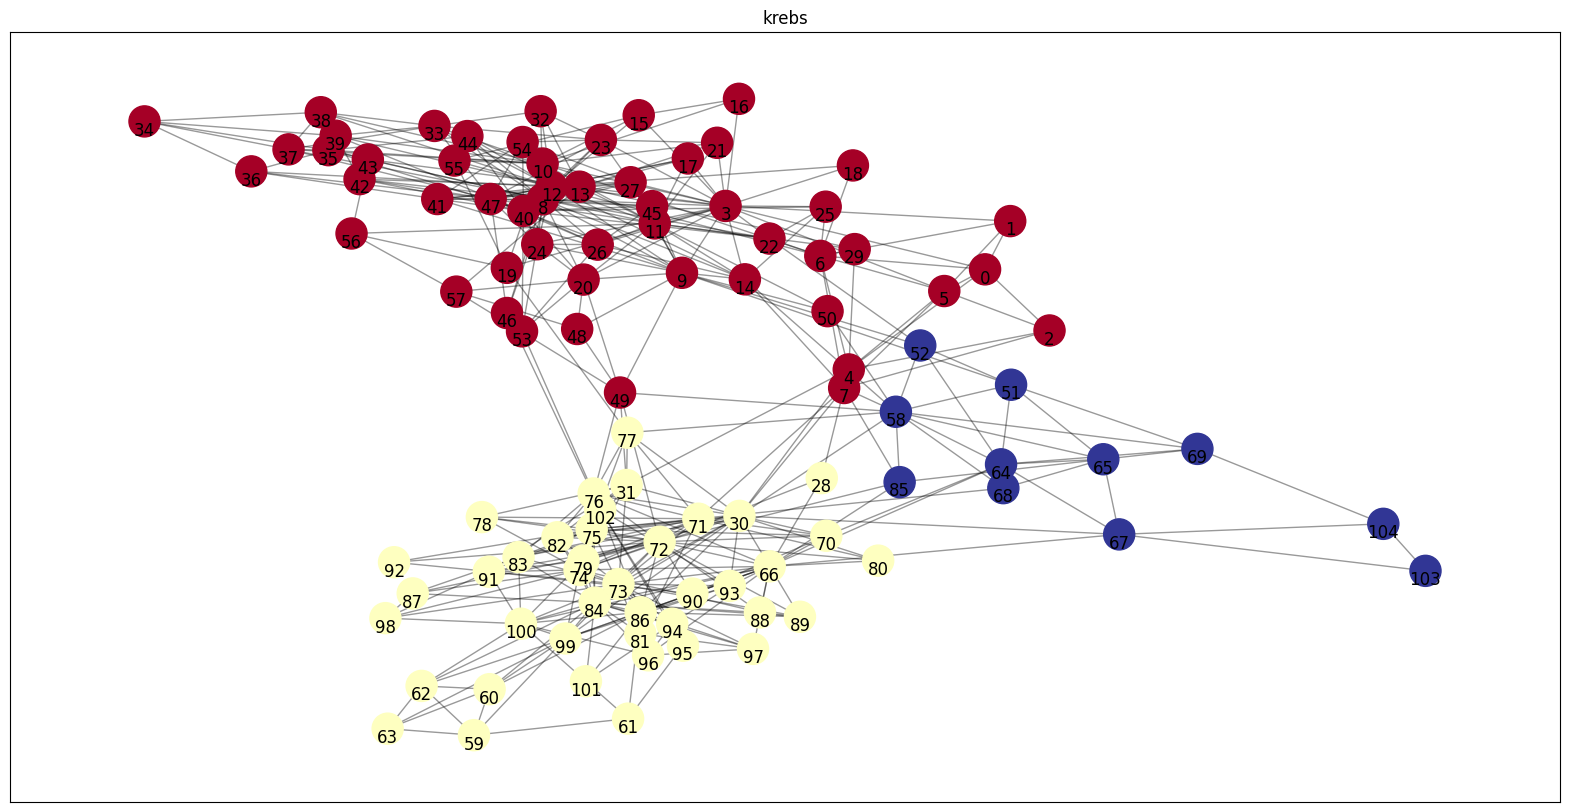

Community assignments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 28, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 51, 0, 0, 0, 0, 0, 51, 28, 28, 28, 28, 28, 51, 51, 28, 51, 51, 51, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 51, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 51, 51]
Best Modularity value: 0.7243355392043442


In [3]:
# prerequisites
import os 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt  


import numpy as np
import networkx as nx

def transform_list(lst):
    mapping = {}
    counter = 1
    result = []
    for elem in lst:
        if elem not in mapping:
            mapping[elem] = counter
            counter += 1
        result.append(mapping[elem])
    return result

def newman_fast_greedy(G):
    # Initialize community assignments for each node
    communities = {i: i for i in G.nodes()}
    
    # Initialize modularity value
    Q = 0
    best_Q = -1
    # Initialize list of communities
    community_list = list(communities.values())
    
    while len(community_list) > 1:
        # Compute modularity gain for all possible merges
        modularity_gain = {}
        for i in community_list:
            for j in community_list:
                if i != j:
                    modularity_gain[(i, j)] = compute_modularity_gain(G, communities, i, j)
        
        # Find the best merge according to modularity gain
        best_merge = max(modularity_gain, key=modularity_gain.get)
        merge_gain = modularity_gain[best_merge]
        
        # Merge the two communities
        new_community = min(best_merge)
        old_community = max(best_merge)
        for node in communities:
            if communities[node] == old_community:
                communities[node] = new_community
        
        # Update modularity value and community list
        Q += merge_gain

        #print(Q)
        
        community_list.remove(old_community)

        if Q > best_Q:
            best_Q=Q
            best=list(communities.values())
    
    return best, best_Q

def compute_modularity_gain(G, communities, c1, c2):
    # Compute the change in modularity resulting from merging communities c1 and c2
    delta_Q = 0
    nodes_c1 = [n for n in communities if communities[n] == c1]
    nodes_c2 = [n for n in communities if communities[n] == c2]
    E_c1c2 = sum([1 for (u, v) in G.edges() if (u in nodes_c1 and v in nodes_c2) or (u in nodes_c2 and v in nodes_c1)])
    E_c1 = sum([G.degree(n) for n in nodes_c1])
    E_c2 = sum([G.degree(n) for n in nodes_c2])
    m = 2 * G.number_of_edges()
    delta_Q = (2*E_c1c2/m) - ((E_c1/m) * (E_c2/m))
    return delta_Q

def plotNetwork(G, communities,title):
    np.random.seed(29)  # to freeze the graph's view (networks uses a random view)
    pos = nx.spring_layout(G)  # compute graph layout
    plt.figure(figsize=(20, 10)) 
    plt.title(title)
    nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.RdYlBu, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    #nx.draw_networkx_labels(G, pos,bbox=dict(edgecolor='black', boxstyle='round,pad=0.1'),verticalalignment='top')
    nx.draw_networkx_labels(G, pos,verticalalignment='top')
    plt.show()


network_files = ['data/science.gml','data/london_bars.gml','data/proteine.gml','data/zebra.gml','data/corporate_club.gml','data/iceland.gml','data/train_bombing.gml','data/karate.gml','data/dolphins.gml','data/football.gml','data/krebs.gml']
#This undirected network contains interactions between 28 Grévy's zebras (Equus grevyi) in Kenya. A node represents a zebra and an edge between two zebras shows that there was an interaction between them during the study.
#This bipartite network contains membership information of corporate executive officers in social organizations such as clubs and boards. Left nodes represent persons and right nodes represent social organisations. An edge between a person and a social organization shows that the person is a member.
for network_file in network_files:
    file_name = os.path.basename(network_file)
    G = nx.read_gml(network_file,label='id')
    # Call the Newman fast algorithm for community detection
    communities, modularity = newman_fast_greedy(G)
    colors=transform_list(communities)
    title=os.path.splitext(file_name)[0]
    plotNetwork(G,colors,title)
  # Print the results
    print("Community assignments:", communities)
    print("Best Modularity value:", modularity)
